In [1]:
import os
from MOLLI_fit import *
import numpy as np
from load_cppimg import load_img
from tqdm import tqdm

path = '../experiments/exp_MOLLI_0_4_1x1/ID0_Speed_min0.0_max0.0'



In [2]:
def MF_MAGIR_fit(path,show_MOLLI=False,show_T1=False):
    MOLLI_readout_img=[]
    MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
    for i in range(8):
        MOLLI_readout_img.append(load_img(
            path,i)[:-1,:])
    MOLLI_readout_img = np.asarray(MOLLI_readout_img)

    # print(MOLLI_readout_img[:, 15, 15])
    if show_MOLLI:
        plt.figure(figsize=(18,8))
        for i in range(8):
            plt.subplot(2, 4, i+1)
            plt.imshow(MOLLI_readout_img[i])
            plt.colorbar()
            plt.clim(0,MOLLI_readout_img.max())
        plt.show()

    T1_result = np.zeros(MOLLI_readout_img[0].shape)

    for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
        T1_star, T1, A, B = MF_MAGIR(
        # T1_star, T1, A, B = MAGIR(
            MOLLI_readout_t, MOLLI_readout_img[:, x, y]/1.5e3)
        T1_result[x, y] = T1
    if show_T1:
        plt.figure()
        plt.imshow(T1_result)
        plt.colorbar()
        # plt.clim(0,2)
    return MOLLI_readout_img,T1_result

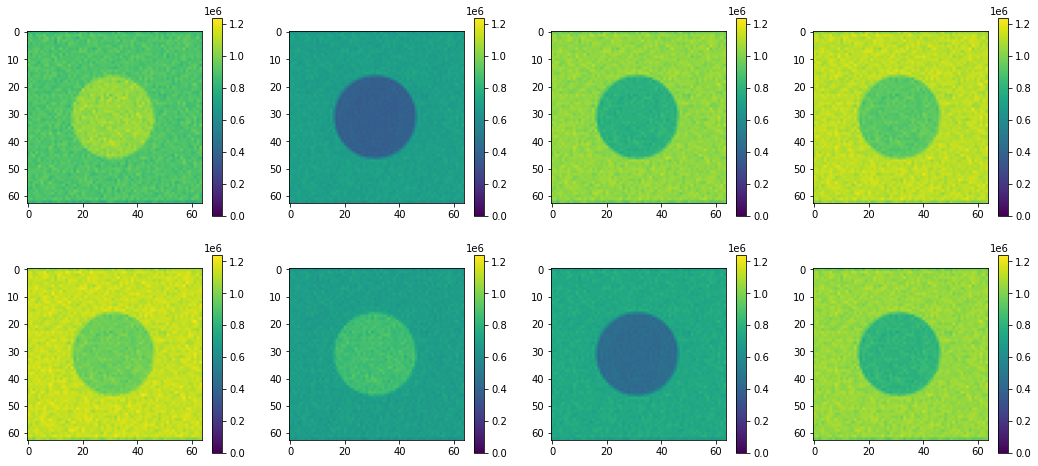

2it [00:00,  4.80it/s]e:\miniconda\envs\YOLO\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
191it [00:24, 11.88it/s]e:\ShanghaiTech\毕设\Flow-Bloch-T1-mapping-cpp\python\MOLLI_fit.py:27: RuntimeWarning: overflow encountered in exp
  return A - B * np.exp(-t / T1)
724it [01:36, 10.61it/s]e:\ShanghaiTech\毕设\Flow-Bloch-T1-mapping-cpp\python\MOLLI_fit.py:27: RuntimeWarning: overflow encountered in multiply
  return A - B * np.exp(-t / T1)
4032it [06:16, 10.71it/s]


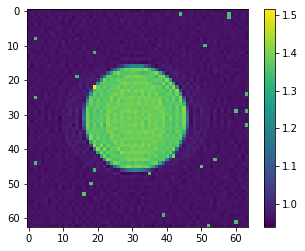

In [3]:
readout_img,T1_result=MF_MAGIR_fit(path,show_MOLLI=True,show_T1=True)

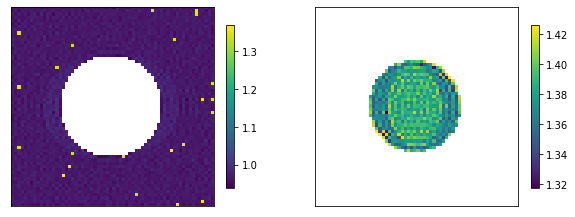

In [4]:
mask_external=np.zeros(T1_result.shape)
for i,j in np.ndindex(mask_external.shape):
    if (i-31)**2+(j-31)**2<16**2:
        mask_external[i,j]=1
mask_internal=np.zeros(T1_result.shape)
for i,j in np.ndindex(mask_internal.shape):
    if (i-31)**2+(j-31)**2>14.5**2:
        mask_internal[i,j]=1
import seaborn as sns

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
myo= np.ma.masked_array(T1_result, mask=mask_external)
plt.imshow(myo)
plt.xticks([])
plt.yticks([])
plt.colorbar(shrink=0.3)

plt.subplot(1,2,2)
vessel = np.ma.masked_array(T1_result, mask=mask_internal)
plt.imshow(vessel)
plt.xticks([])
plt.yticks([])
plt.colorbar(shrink=0.3)

(4032,)


Text(0.5, 0, 'T1 (s)')

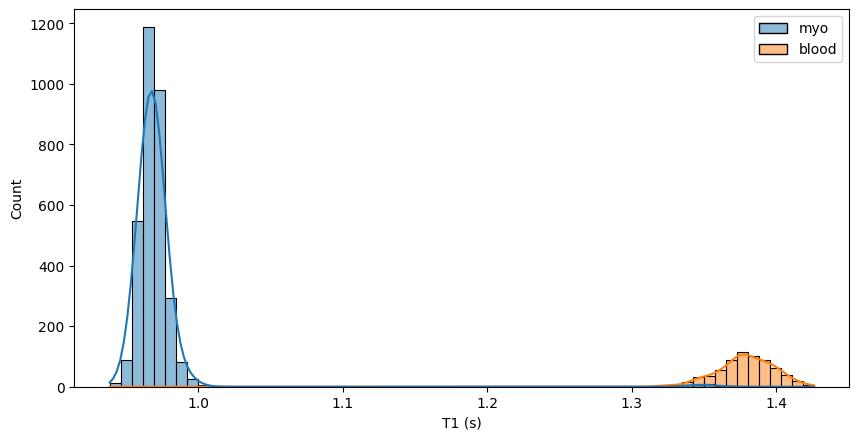

In [5]:
import pandas as pd
plt.figure(figsize=(10,5),dpi=100)
# plt.subplot(2,1,1)
# plt.hist(myo.compressed(),bins=100)
print(myo.reshape(-1).shape)
data=pd.DataFrame()
data["myo"]=myo.reshape(-1)
data["blood"]=vessel.reshape(-1)
sns.histplot(data=data,bins=64,kde=True)
plt.xlabel("T1 (s)")
# sns.histplot(myo.compressed(),bins=128,kde=True)
# plt.xlim(0.8,1.6)
# plt.subplot(2,1,2)
# plt.hist(vessel.compressed(),bins=100,kde=True)
# sns.histplot(vessel.compressed(),bins=128,kde=True)
# plt.xlabel("T1 (s)")
# plt.xlim(0.8,1.6)

In [9]:
readout_sig_external=[]
readout_sig_internal=[]

for i in range(8):
    readout_sig_external.append(np.ma.masked_array(readout_img[i], mask=mask_external).mean())
    readout_sig_internal.append(np.ma.masked_array(readout_img[i], mask=mask_internal).mean())

readout_sig_external=np.asarray(readout_sig_external)
readout_sig_internal=np.asarray(readout_sig_internal)

print(readout_sig_external)
print(readout_sig_internal)

[ 894457.4398383   698270.53247632 1033793.50042229 1111197.78708188
 1129440.41968674  690683.02400505  746525.1144189  1044569.88897833]
[1044529.85002354  376658.49271929  788715.98717477  920421.37794236
  963492.15920962  862004.50830856  436858.00305431  807310.33247591]
